In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\chenr\AppData\Local\Temp\ipykernel_15428\1230538152.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  property_data = pd.read_csv("fy2025-property-assessment-data_12_30_2024.csv")
C:\Users\chenr\AppData\Local\Temp\ipykernel_15428\1230538152.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


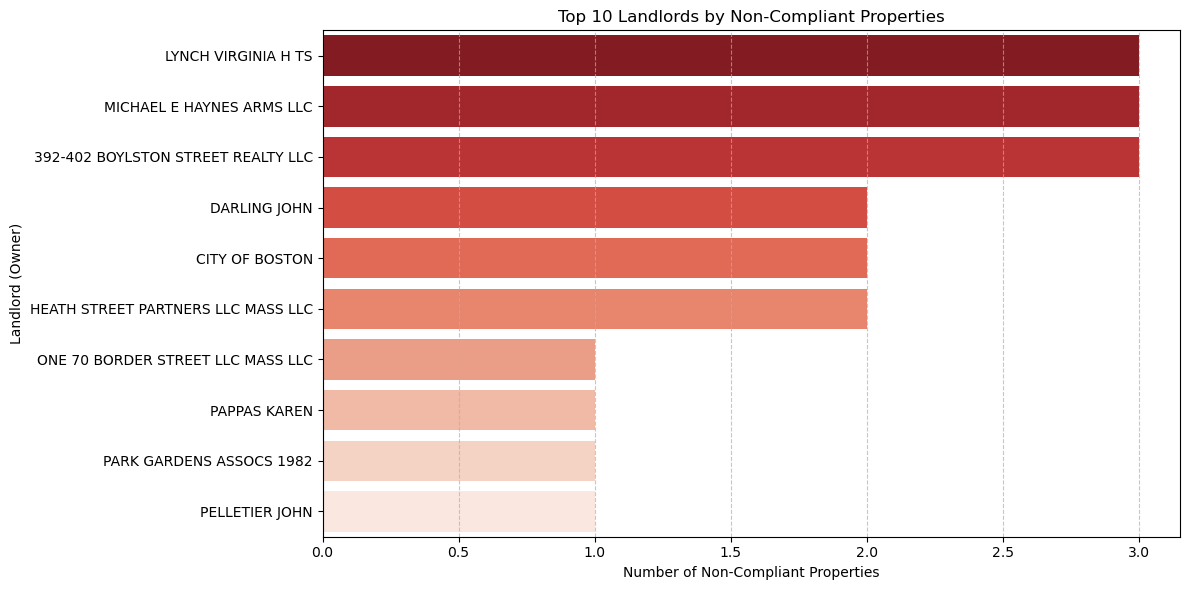

C:\Users\chenr\AppData\Local\Temp\ipykernel_15428\1230538152.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


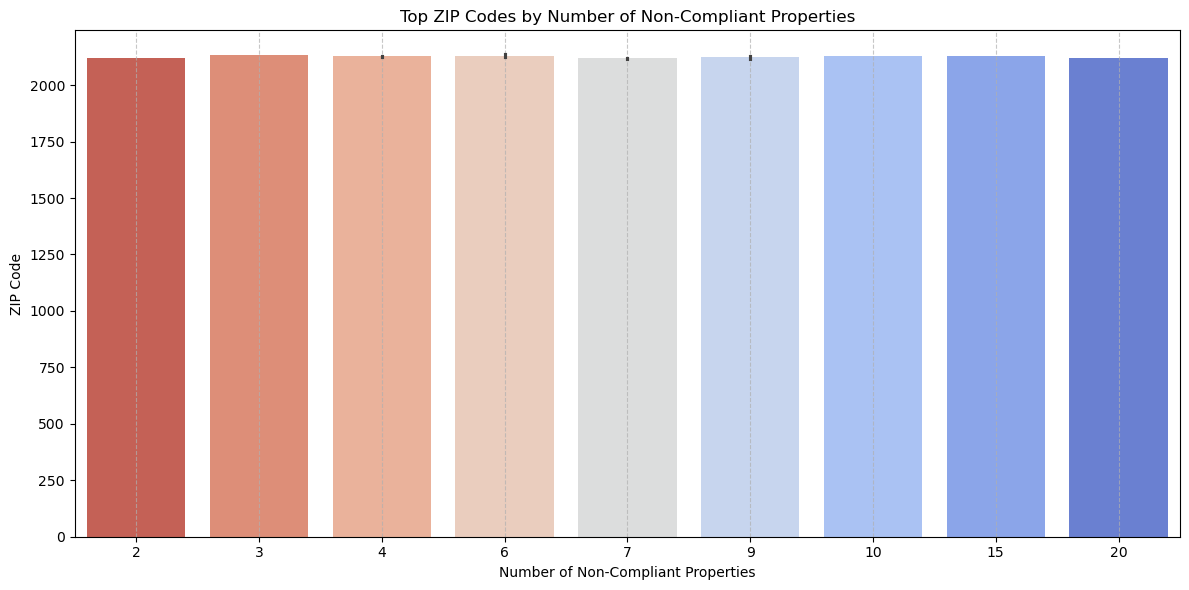

In [9]:
climate_data = pd.read_csv("Climate_Ready_Boston_Social_Vulnerability.csv")
property_data = pd.read_csv("fy2025-property-assessment-data_12_30_2024.csv")

non_compliant_conditions = ['P - Poor', 'VP - Very Poor', 'US - Unsound']
severe_conditions = ['VP - Very Poor', 'US - Unsound']

property_data['non_compliant'] = property_data['OVERALL_COND'].isin(non_compliant_conditions)
property_data['severe_non_compliant'] = property_data['OVERALL_COND'].isin(severe_conditions)

landlord_summary = property_data.groupby('OWNER').agg(
    total_properties=('PID', 'count'),
    non_compliant_properties=('non_compliant', 'sum'),
    severe_violations=('severe_non_compliant', 'sum')
).reset_index()

landlord_summary = landlord_summary[landlord_summary['non_compliant_properties'] > 0]
landlord_summary_sorted = landlord_summary.sort_values(by='non_compliant_properties', ascending=False)

top_10_landlords = landlord_summary_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_landlords,
    x='non_compliant_properties',
    y='OWNER',
    palette='Reds_r'
)
plt.title('Top 10 Landlords by Non-Compliant Properties')
plt.xlabel('Number of Non-Compliant Properties')
plt.ylabel('Landlord (Owner)')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

non_compliant_properties = property_data[property_data['non_compliant']]

zip_summary = non_compliant_properties.groupby('ZIP_CODE').agg(
    non_compliant_count=('PID', 'count')
).reset_index()

zip_summary = zip_summary.dropna()

zip_summary = zip_summary.sort_values(by='non_compliant_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=zip_summary.head(15),  
    x='non_compliant_count',
    y='ZIP_CODE',
    palette='coolwarm_r'
)
plt.title('Top ZIP Codes by Number of Non-Compliant Properties')
plt.xlabel('Number of Non-Compliant Properties')
plt.ylabel('ZIP Code')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


- Top offenders—Lynch Virginia H TS; Michael E Haynes Arms LLC; 392-402 Boylston Street Realty LLC—each own multiple properties in poor, very poor, or unsound condition.

- “Non-compliant” here refers to buildings rated Poor, Very Poor, or Unsound, indicating serious habitability or structural issues.

- The City of Boston appears among the top ten, suggesting some publicly owned properties may also be neglected.

- A small number of landlords account for a large share of all non-compliant properties, meaning enforcement efforts focused on these owners could yield significant improvements.

- Many of these properties are likely located in socially vulnerable neighborhoods, compounding risks related to poverty, health, and displacement.

- Recommended actions include stronger and more frequent inspections, transparent public reporting of violations, and targeted penalties or remediation requirements for repeat offenders.

- Adding geospatial mapping of non-compliant properties—especially overlaid with social vulnerability data—would help identify hotspots for prioritizing resources.